In [9]:
import os
import sys

# Adiciona a pasta raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [10]:
from src.model import kfold_model, linearRegression_model, randomForest_model
from src.data import load_custom_csv
from src.utils import plot_regressor_model_ultils

In [11]:
# Importando biblioteca
df = load_custom_csv("AEP_ready.csv")

In [12]:
df2 = df.copy()
df2 = df2.drop('Datetime', axis=1)
df2

,AEP_MW,year,month,day,hour,dayofweek,is_weekend
0,12379.0,2004,10,1,1,4,0
1,11935.0,2004,10,1,2,4,0
2,11692.0,2004,10,1,3,4,0
3,11597.0,2004,10,1,4,4,0
4,11681.0,2004,10,1,5,4,0
...,...,...,...,...,...,...,...
121268,17673.0,2018,8,2,20,3,0
121269,17303.0,2018,8,2,21,3,0
121270,17001.0,2018,8,2,22,3,0
121271,15964.0,2018,8,2,23,3,0


In [13]:
# Separando entrada e saída
df_input = df2.drop("AEP_MW", axis=1).copy()
df_target = df2['AEP_MW'].copy()

# Linear Regression

In [14]:
# Linear Regression
cv = kfold_model(5, 0)
linearRegression, pred, target = linearRegression_model(df_input, df_target, cv, 'r2')
for metric, value in linearRegression.items():
    print(f"{metric}: {value}")

R2: 0.29846750645974407
MAE: 1754.416925834163
MSE: 4710996.763945858
RMSE: 2170.4830715639914


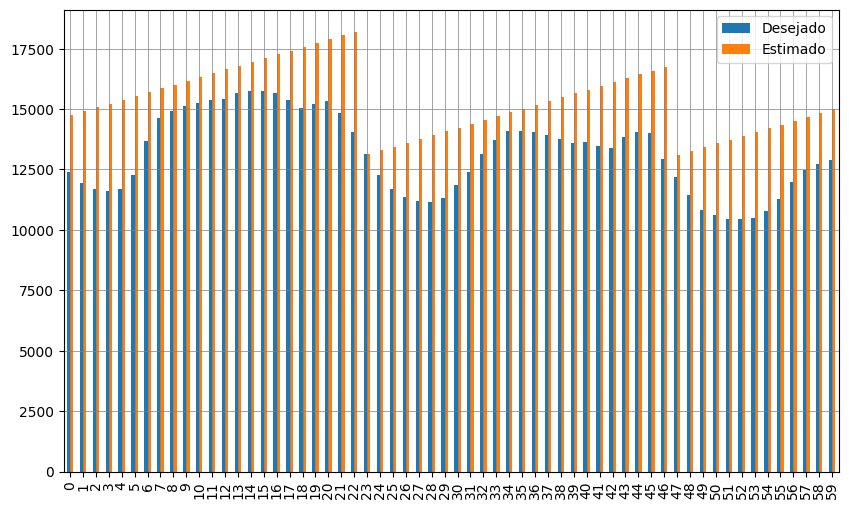

In [15]:
# Plotando gráfico de regressão
plot_regressor_model_ultils(pred, target)

# Random Forest Regressor